In [205]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt, exp, pi
import seaborn as sns

# Ejercicio 1

In [206]:
# Cálculo de la semilla

padrones = [90638, 90638, 99714, 101939, 99689]
avg_padrones = sum(padrones) / len(padrones)
seed = int(avg_padrones)
seed

96523

In [207]:
# GCL 
# Genera números al azar entre 0 y 1 a partir de una semilla num.
modulo = 4294967296
multiplicador = 1013904223
incremento = 1664525

def next(num):
    return (multiplicador * num + incremento) % modulo

In [208]:
# Test
l=[]
num = next(seed)
for i in range(10000):
    l.append(num / modulo)
    num = next(num) 

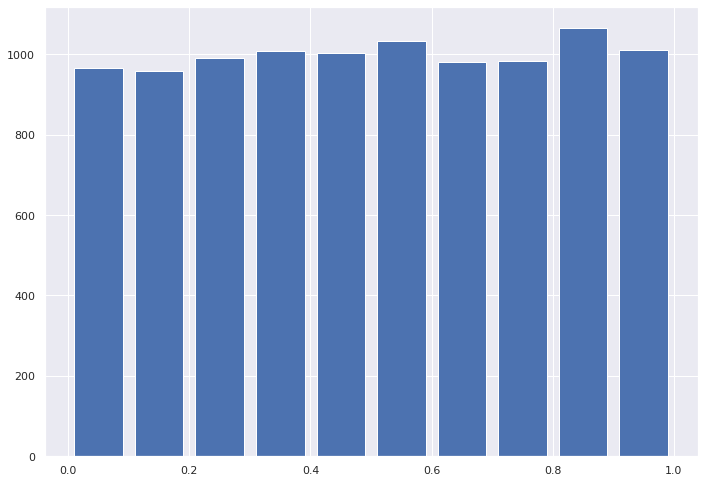

In [209]:
# Gráficos
plt.hist(l, rwidth = 0.8) 
plt.show()

# Ejercicio 2) a.

In [210]:
values = [2,3,4,5,6]
p = [2730/10000,5200/10000,1370/10000,480/10000,220/10000]

# Se probó que con una distribución distinta sí se rechaza la hipótesis nula.
# p = [1000/10000,6570/10000,1370/10000,480/10000,220/10000]
p

[0.273, 0.52, 0.137, 0.048, 0.022]

In [211]:
proba_vector = [0, p[0], p[0] + p[1], p[0] + p[1] + p[2], p[0] + p[1] + p[2] + p[3], p[0] + p[1] + p[2] + p[3] + p[4]]
proba_vector

[0, 0.273, 0.793, 0.93, 0.9780000000000001, 1.0]

In [212]:
#      p2                       p3                          p4                 p5          p6
# 0 -------- 0.273 ----------------------- 0.793 ----------------------- 0.93 ----- 0.978 ---- 1

def find_label(x, proba_vec):
    label_idx = 0
    for idx in range(0, len(proba_vec)-1):
        if ((x >= proba_vec[idx]) and (x <= proba_vec[idx+1])):
            label_idx = idx
    return values[label_idx]

# Test
print(find_label(0.1, proba_vector)) # should be 2
print(find_label(0.2, proba_vector)) # should be 2
print(find_label(0.5, proba_vector)) # should be 3
print(find_label(0.8, proba_vector)) # should be 4
print(find_label(0.96, proba_vector)) # should be 5
print(find_label(0.99, proba_vector)) # should be 6

2
2
3
4
5
6


In [213]:
# Genero las simulaciones de valores.

variable_values=[]
num = next(seed)
for i in range(100000):
    variable_values.append(find_label(num / modulo, proba_vector))
    num = next(num) 

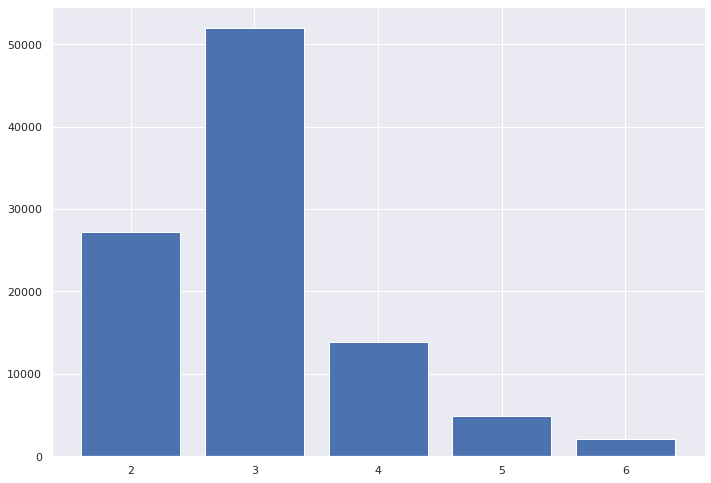

In [214]:
# Gráficos

plt.bar(*np.unique(variable_values, return_counts=True))
plt.show()

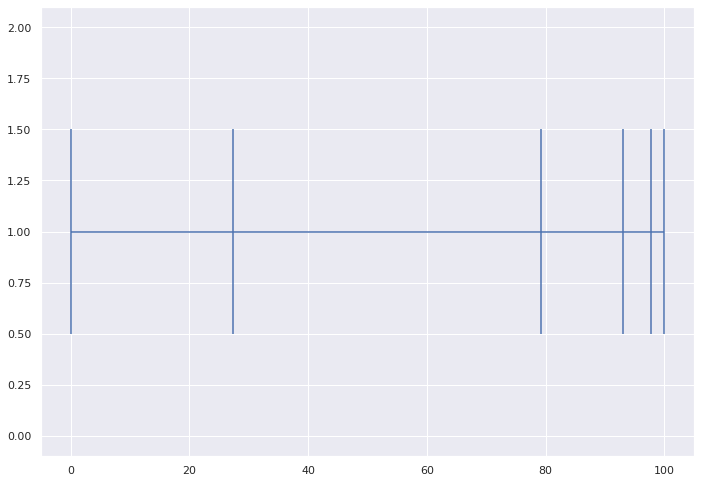

In [215]:
plt.figure()
a = [number*100 for number in proba_vector]
plt.hlines(1,0,100)  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal', colors='b')
plt.show()

# Ejercicio 2b

In [216]:
# Creo un dict, donde las keys son las etiquetas y los valores son las probabilidades de cada una.

proba_dict = dict(zip(values, p))
proba_dict

{2: 0.273, 3: 0.52, 4: 0.137, 5: 0.048, 6: 0.022}

## Test de chi2
Hipótesis nula: la distribución se corresponde con la propuesta por el enunciado.

In [217]:
# Estadístico del test: d^2 = sum i...k( (Ys - n * ps)^2 / (n * ps) )

from scipy.stats import chi2

d2 = 0
for i in range(2, 7):
    freq_observed = len([val for val in variable_values if val == i])
    freq_expected = proba_dict[i] * len(variable_values)
    partial_sum = (freq_observed - freq_expected)**2 / (freq_expected)
    d2 = d2 + partial_sum

# df son los grados de libertad de la chi, debería ser la cantidad de labels (K) menos 1 
sup_limit = chi2.ppf(0.95, df=4)
print("Límite superior: " + str(sup_limit))
print("D2: " + str(d2))

if d2 <= sup_limit:  
    print("El test no rechaza la hipotesis nula.") 
else:  
    print("El test rechaza la hipótesis nula") 

Límite superior: 9.487729036781154
D2: 5.177128632012732
El test no rechaza la hipotesis nula.


# Ejercicio 3

## Generar una distribución gaussiana
Se generara una distribución gaussiana a partir del método de aceptación y rechazo usando como base una exponencial generada con transformada inversa.

In [218]:
CANT= 100000
COTA = sqrt(2*exp(1)/pi)
DESVIO = 2
MEDIA = 15
estandar_simulados = []

def gaussian(x):
    return exp(-1/2 * x**2) / sqrt(2 * pi)

def valor_normal(x):
    return MEDIA + DESVIO * x

def aceptation_proba(x):
    return gaussian(x) / (exp(-x) * COTA)

i = 0
while i < CANT:
    num1 = np.random.exponential(1)
    num2= np.random.uniform()
    if ( num2 < aceptation_proba(num1)):
           estandar_simulados.append(num1) if np.random.rand() < 0.5 else estandar_simulados.append(-num1)           
    i +=1
            
simulados = [valor_normal(numero) for numero in estandar_simulados]

Text(0.5, 1.0, 'N(15, 2)')

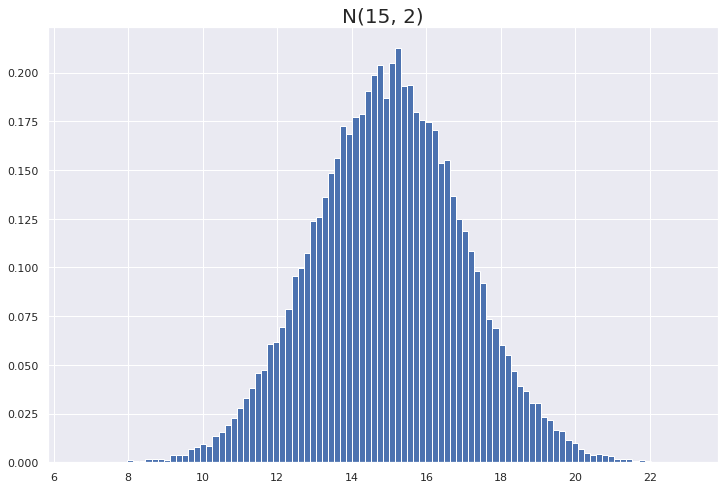

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.hist(simulados,100, density=True)
plt.title("N(15, 2)", fontsize=20)

Calculamos la media y varianza

In [220]:
print(f"Media : {np.mean(simulados)}")
print(f"Vairanza : {np.var(simulados)}")

Media : 14.992448959532217
Vairanza : 4.012836287574629


El test que utilizaremos para comprobar si los datos obetenidos siguen o no a una distribucion normal es el test de Kolmogorov Smirnov

In [221]:
alpha = 0.05

def kolmogorov_smirnov_test():  
    r = st.kstest(simulados, st.norm(MEDIA, DESVIO).cdf)
    print("Estadistico: " + str(r.statistic))
    if (r.pvalue < alpha):
        print(f"No siguen la distribucion pedida, el p-valor es {r.pvalue}")
    else:
        print('%.3f: %.3f, No se puede rechazar H0' % (alpha, r.pvalue))

kolmogorov_smirnov_test()

Estadistico: 0.003531093578878375
0.050: 0.728, No se puede rechazar H0


# Ejercicio 4. a

In [222]:
# Cargamos la simulación de arribos
Z = np.loadtxt('docs/tiempos_entre_arribos.txt')

Text(0.5, 1.0, 'Tiempo entre arribos')

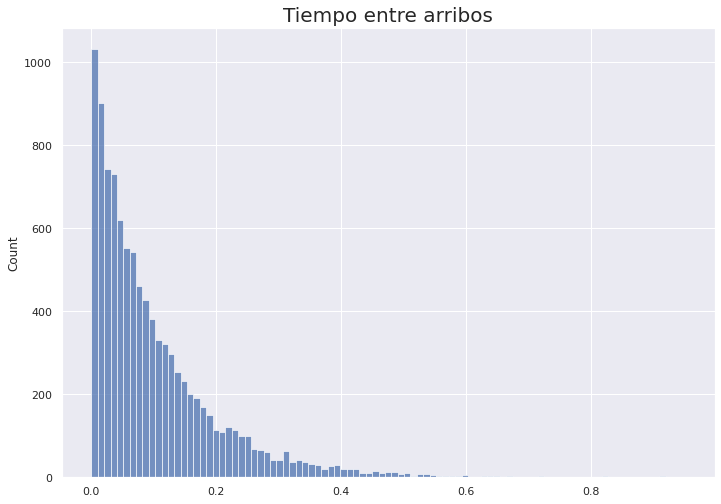

In [223]:
# Por definicion de Proceso de Poisson, el tiempo entre arribos debe seguir
# una distribución exponencial.
sns.histplot(Z)
plt.title("Tiempo entre arribos", fontsize=20)

In [224]:
# A priori sigue una distribución exponencial. Por propiedad E[Z] = 1 / lambda.
# Utilizando el estimador por máxima verosimilitud se llega que lambda ~ 1 / avg(Z)

# Estimación de la tasa
tasa = len(Z) / sum(Z)
tasa

9.889245996494681

In [225]:
# Test Anderson-Darling
# H0: Z sigue una distribución exponencial.
from numpy.random import randn
from scipy.stats import anderson

#Ejecutamos el test
resultado = anderson(Z, dist='expon')

print('Estadístico: %.3f' % resultado.statistic)

for i in range(len(resultado.critical_values)):
    nivel_significancia, umbral = resultado.significance_level[i]/100, resultado.critical_values[i]
    if resultado.statistic < resultado.critical_values[i]:
        print('%.3f: %.3f, Datos exponenciales (No se puede rechazar H0)' % (nivel_significancia, umbral))
    else:
        print('%.3f: %.3f, Datos No exponenciales (Se rechaza H0)' % (nivel_significancia, umbral))

Estadístico: 2.003
0.150: 0.922, Datos No exponenciales (Se rechaza H0)
0.100: 1.078, Datos No exponenciales (Se rechaza H0)
0.050: 1.341, Datos No exponenciales (Se rechaza H0)
0.025: 1.606, Datos No exponenciales (Se rechaza H0)
0.010: 1.957, Datos No exponenciales (Se rechaza H0)


In [226]:
# Para los niveles de significancia analizados 0.01, 0.025, 0.05, 0.1 y 0.15 se rechaza Ho
# Por lo que podemos concluir que Z no sigue una distribucion exponencial.

In [227]:
# Genero un vector de distribución exponencial a partir del generador utilizando la inversa
# de la funcion de densidad de la misma.

# Inversa de la densidad de una VA exponencial
def inv_exponential(x, mu):
    return (- np.log(1-x) / mu)

def exponential(num, mu=tasa):
    return inv_exponential(num / modulo, mu)

def sim_poisson(seed, n=10000, t_limit=-1):
    accum = 0
    num = seed
    P = []
    while (accum <= t_limit if t_limit > 0 else True) and (len(P) < n if n > 0 else True):
        num = next(num)
        z = exponential(num)
        accum += z
        P.append(accum)
        
    return P

<AxesSubplot:>

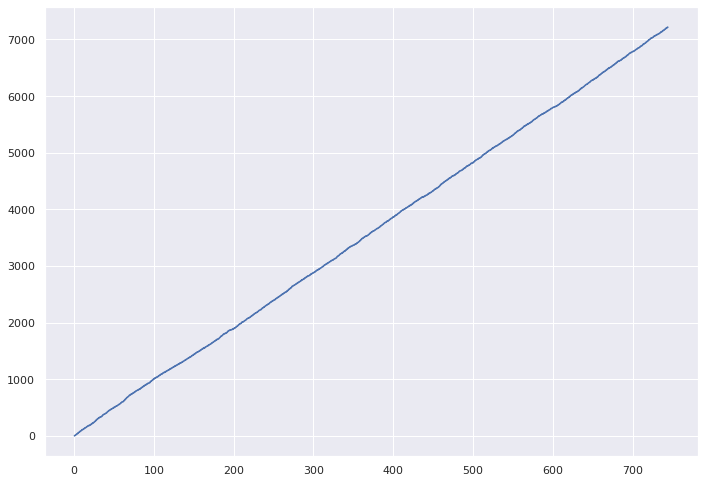

In [228]:
# Un mes, se asumen 31 días -> 744 hs
P = sim_poisson(int(avg_padrones), n=-1, t_limit=744)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=P, y=range(len(P)), drawstyle='steps-post')

# Ejercicio 4. b

In [229]:
from scipy.stats import poisson

TOTAL_MUESTRAS = 1000
TIEMPO_HS = 73

# 1000 muestras de Poisson con lamda = 9.88 hasta 73 horas.
muestras = [sim_poisson(x, t_limit=TIEMPO_HS) for x in range(0, TOTAL_MUESTRAS)]

def positivos(muestras, f):
    return sum([1 for x in muestras if f(x)])

In [230]:
# Las muestras que caen dentro del intervalo [0, t).
def first_bucket(P, t):
    N = []
    for x in P:
        if x < t:
            N.append(x)
        else:
            return N

##### Probabilidad que el primer vehículo arribe antes de los 10 minutos.

In [231]:
# La calculamos como: P(X >= 1) = 1 - P(X = 0), para t = 1/6 hs.

# Estimación
T_A = 1/6

# Primer arribo antes de los 10 min.
def cumple_a(poisson):
    return poisson[0] < T_A

positivos(muestras, cumple_a) / TOTAL_MUESTRAS

0.806

In [232]:
# Teoricamente
# P(X >= 1) = 1 - P (X = 0)
1 - poisson.pmf(0, tasa * T_A)

0.8076055651533732

##### Probabilidad que el undécimo vehículo arribe después de los 60 minutos.

In [233]:
# La calculamos como: P(X < 12) = P(X = 0) +...+ P(X = 11), para t = 1 hr.
# Estimación
T_B = 1

def cumple_b(poisson):
    return len(first_bucket(poisson, T_B)) < 12
    
positivos(muestras, cumple_b) / TOTAL_MUESTRAS

0.713

In [234]:
# Teoricamente
sum([poisson.pmf(X, tasa * T_B) for X in range(0, 12)])

0.7093005827751792

##### Probabilidad que arriben al menos 750 vehículos antes de las 72 horas.

In [235]:
# La calculamos como P(X >= 750) = 1 - P(X < 750) = ...
# Estimación
T_C = 72

def cumple_c(poisson):
    return len(first_bucket(poisson, T_C)) >= 750
    
positivos(muestras, cumple_c) / TOTAL_MUESTRAS

0.086

In [236]:
# Teoricamente
mu = tasa * T_C
1 - sum([poisson.pmf(k, mu) for k in range(0, 750)])

0.0809784853589276